#               TOURIST SPENDING PREDICTION MODEL

CONTEXT:
The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa. Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

AIM:
The aim of this project is to explore and build a linear regression model that will predict the spending behaivior of tourists visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#Importing dataset for the analysis.
Tz = pd.read_csv("Train .csv")
Tz

ID                   country age_group        travel_with  \
0        tour_0                SWIZERLAND     45-64  Friends/Relatives   
1       tour_10            UNITED KINGDOM     25-44                NaN   
2     tour_1000            UNITED KINGDOM     25-44              Alone   
3     tour_1002            UNITED KINGDOM     25-44             Spouse   
4     tour_1004                     CHINA      1-24                NaN   
...         ...                       ...       ...                ...   
4804   tour_993                       UAE     45-64              Alone   
4805   tour_994  UNITED STATES OF AMERICA     25-44             Spouse   
4806   tour_995               NETHERLANDS      1-24                NaN   
4807   tour_997              SOUTH AFRICA     25-44  Friends/Relatives   
4808   tour_999            UNITED KINGDOM     25-44             Spouse   

      total_female  total_male                         purpose  \
0              1.0         1.0            Leisure and Holidays   
1              1.0         0.0            Leisure and Holidays   
2              0.0         1.0  Visiting Friends and Relatives   
3              1.0         1.0            Leisure and Holidays   
4              1.0         0.0            Leisure and Holidays   
...            ...         ...                             ...   
4804           0.0         1.0                        Business   
4805           1.0         1.0            Leisure and Holidays   
4806           1.0         0.0            Leisure and Holidays   
4807           1.0         1.0                        Business   
4808           1.0         1.0            Leisure and Holidays   

         main_activity                   info_source tour_arrangement  ...  \
0     Wildlife tourism            Friends, relatives      Independent  ...   
1     Cultural tourism                        others      Independent  ...   
2     Cultural tourism            Friends, relatives      Independent  ...   
3     Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4     Wildlife tourism  Travel, agent, tour operator      Independent  ...   
...                ...                           ...              ...  ...   
4804   Hunting tourism            Friends, relatives      Independent  ...   
4805  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4806  Wildlife tourism                        others      Independent  ...   
4807     Beach tourism  Travel, agent, tour operator      Independent  ...   
4808  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
0                      No                  No                  No   
1                      No                  No                  No   
2                      No                  No                  No   
3                     Yes                 Yes                 Yes   
4                      No                  No                  No   
...                   ...                 ...                 ...   
4804                   No                  No                  No   
4805                  Yes                 Yes                 Yes   
4806                   No                  No                  No   
4807                   No                  No                  No   
4808                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
0                   No           13.0            0.0         Cash   
1                   No           14.0            7.0         Cash   
2                   No            1.0           31.0         Cash   
3                   No           11.0            0.0         Cash   
4                   No            7.0            4.0         Cash   
...                ...            ...            ...          ...   
4804                No            2.0            0.0  Credit Card   
4805         

In [5]:
#Showing the top most records
Tz.head(20)

ID                   country age_group        travel_with  \
0      tour_0                SWIZERLAND     45-64  Friends/Relatives   
1     tour_10            UNITED KINGDOM     25-44                NaN   
2   tour_1000            UNITED KINGDOM     25-44              Alone   
3   tour_1002            UNITED KINGDOM     25-44             Spouse   
4   tour_1004                     CHINA      1-24                NaN   
5   tour_1005            UNITED KINGDOM     25-44                NaN   
6   tour_1007              SOUTH AFRICA     45-64              Alone   
7   tour_1008  UNITED STATES OF AMERICA     45-64  Friends/Relatives   
8    tour_101                   NIGERIA     25-44              Alone   
9   tour_1011                     INDIA     25-44              Alone   
10  tour_1012                    BRAZIL     25-44             Spouse   
11  tour_1013                    CANADA     45-64           Children   
12  tour_1016                    CANADA     45-64           Children   
13  tour_1017                      MALT     25-44  Friends/Relatives   
14  tour_1018                MOZAMBIQUE     25-44              Alone   
15   tour_102                    RWANDA       65+              Alone   
16  tour_1021                   AUSTRIA     45-64  Friends/Relatives   
17  tour_1022                   MYANMAR     25-44                NaN   
18  tour_1024                   GERMANY     25-44           Children   
19  tour_1026                     KENYA     25-44                NaN   

    total_female  total_male                         purpose  \
0            1.0         1.0            Leisure and Holidays   
1            1.0         0.0            Leisure and Holidays   
2            0.0         1.0  Visiting Friends and Relatives   
3            1.0         1.0            Leisure and Holidays   
4            1.0         0.0            Leisure and Holidays   
5            0.0         1.0            Leisure and Holidays   
6            0.0         1.0                        Business   
7            1.0         1.0            Leisure and Holidays   
8            0.0         1.0            Leisure and Holidays   
9            1.0         0.0                        Business   
10           1.0         1.0            Leisure and Holidays   
11           2.0         0.0            Leisure and Holidays   
12           0.0         2.0            Leisure and Holidays   
13           2.0         0.0            Leisure and Holidays   
14           0.0         1.0  Visiting Friends and Relatives   
15           1.0         0.0            Leisure and Holidays   
16           4.0         1.0  Visiting Friends and Relatives   
17           1.0         0.0         Meetings and Conference   
18           1.0         1.0  Visiting Friends and Relatives   
19           1.0         0.0                        Business   

        main_activity                   info_source tour_arrangement  ...  \
0    Wildlife tourism            Friends, relatives      Independent  ...   
1    Cultural tourism                        others      Independent  ...   
2    Cultural tourism            Friends, relatives      Independent  ...   
3    Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4    Wildlife tourism  Travel, agent, tour operator      Independent  ...   
5    Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
6   Mountain climbing            Friends, relatives      Independent  ...   
7    Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
8    Cultural tourism  Travel, agent, tour operator      Independent  ...   
9    Wildlife tourism  Travel, agent, tour operator      Independent  ...   
10   Wildlife tourism                Radio, TV, Web      Independent  ...   
11      Beach tourism            Friends, relatives      Independent  ...   
12   Wildlife tourism  Travel, agent, tour operator      Independent  ...   
13   Wildlife tourism            Friends, relatives     Package Tour  ...  

In [6]:
#Information about the tabular data.
Tz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [7]:
#Statistical description of numerical features.
Tz.describe()

total_female   total_male  night_mainland  night_zanzibar    total_cost
count   4806.000000  4804.000000     4809.000000     4809.000000  4.809000e+03
mean       0.926758     1.009575        8.488043        2.304429  8.114389e+06
std        1.288242     1.138865       10.427624        4.227080  1.222490e+07
min        0.000000     0.000000        0.000000        0.000000  4.900000e+04
25%        0.000000     1.000000        3.000000        0.000000  8.121750e+05
50%        1.000000     1.000000        6.000000        0.000000  3.397875e+06
75%        1.000000     1.000000       11.000000        4.000000  9.945000e+06
max       49.000000    44.000000      145.000000       61.000000  9.953288e+07

# FINDING AND REPLACING MISSING/NULL VALUES.

In [8]:
Tz.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

travel_with, total-female, total male and most_impressing columns have NaN/Null 
values which needs to be filled.

In [9]:
#Travel_with
Tz['travel_with'].fillna('Alone',inplace=True)
Tz

ID                   country age_group        travel_with  \
0        tour_0                SWIZERLAND     45-64  Friends/Relatives   
1       tour_10            UNITED KINGDOM     25-44              Alone   
2     tour_1000            UNITED KINGDOM     25-44              Alone   
3     tour_1002            UNITED KINGDOM     25-44             Spouse   
4     tour_1004                     CHINA      1-24              Alone   
...         ...                       ...       ...                ...   
4804   tour_993                       UAE     45-64              Alone   
4805   tour_994  UNITED STATES OF AMERICA     25-44             Spouse   
4806   tour_995               NETHERLANDS      1-24              Alone   
4807   tour_997              SOUTH AFRICA     25-44  Friends/Relatives   
4808   tour_999            UNITED KINGDOM     25-44             Spouse   

      total_female  total_male                         purpose  \
0              1.0         1.0            Leisure and Holidays   
1              1.0         0.0            Leisure and Holidays   
2              0.0         1.0  Visiting Friends and Relatives   
3              1.0         1.0            Leisure and Holidays   
4              1.0         0.0            Leisure and Holidays   
...            ...         ...                             ...   
4804           0.0         1.0                        Business   
4805           1.0         1.0            Leisure and Holidays   
4806           1.0         0.0            Leisure and Holidays   
4807           1.0         1.0                        Business   
4808           1.0         1.0            Leisure and Holidays   

         main_activity                   info_source tour_arrangement  ...  \
0     Wildlife tourism            Friends, relatives      Independent  ...   
1     Cultural tourism                        others      Independent  ...   
2     Cultural tourism            Friends, relatives      Independent  ...   
3     Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4     Wildlife tourism  Travel, agent, tour operator      Independent  ...   
...                ...                           ...              ...  ...   
4804   Hunting tourism            Friends, relatives      Independent  ...   
4805  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4806  Wildlife tourism                        others      Independent  ...   
4807     Beach tourism  Travel, agent, tour operator      Independent  ...   
4808  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
0                      No                  No                  No   
1                      No                  No                  No   
2                      No                  No                  No   
3                     Yes                 Yes                 Yes   
4                      No                  No                  No   
...                   ...                 ...                 ...   
4804                   No                  No                  No   
4805                  Yes                 Yes                 Yes   
4806                   No                  No                  No   
4807                   No                  No                  No   
4808                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
0                   No           13.0            0.0         Cash   
1                   No           14.0            7.0         Cash   
2                   No            1.0           31.0         Cash   
3                   No           11.0            0.0         Cash   
4                   No            7.0            4.0         Cash   
...                ...            ...            ...          ...   
4804                No            2.0            0.0  Credit Card   
4805         

In [10]:
#Most_impressing
Tz['most_impressing'].fillna('Friendly People',inplace=True)
Tz

ID                   country age_group        travel_with  \
0        tour_0                SWIZERLAND     45-64  Friends/Relatives   
1       tour_10            UNITED KINGDOM     25-44              Alone   
2     tour_1000            UNITED KINGDOM     25-44              Alone   
3     tour_1002            UNITED KINGDOM     25-44             Spouse   
4     tour_1004                     CHINA      1-24              Alone   
...         ...                       ...       ...                ...   
4804   tour_993                       UAE     45-64              Alone   
4805   tour_994  UNITED STATES OF AMERICA     25-44             Spouse   
4806   tour_995               NETHERLANDS      1-24              Alone   
4807   tour_997              SOUTH AFRICA     25-44  Friends/Relatives   
4808   tour_999            UNITED KINGDOM     25-44             Spouse   

      total_female  total_male                         purpose  \
0              1.0         1.0            Leisure and Holidays   
1              1.0         0.0            Leisure and Holidays   
2              0.0         1.0  Visiting Friends and Relatives   
3              1.0         1.0            Leisure and Holidays   
4              1.0         0.0            Leisure and Holidays   
...            ...         ...                             ...   
4804           0.0         1.0                        Business   
4805           1.0         1.0            Leisure and Holidays   
4806           1.0         0.0            Leisure and Holidays   
4807           1.0         1.0                        Business   
4808           1.0         1.0            Leisure and Holidays   

         main_activity                   info_source tour_arrangement  ...  \
0     Wildlife tourism            Friends, relatives      Independent  ...   
1     Cultural tourism                        others      Independent  ...   
2     Cultural tourism            Friends, relatives      Independent  ...   
3     Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4     Wildlife tourism  Travel, agent, tour operator      Independent  ...   
...                ...                           ...              ...  ...   
4804   Hunting tourism            Friends, relatives      Independent  ...   
4805  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4806  Wildlife tourism                        others      Independent  ...   
4807     Beach tourism  Travel, agent, tour operator      Independent  ...   
4808  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
0                      No                  No                  No   
1                      No                  No                  No   
2                      No                  No                  No   
3                     Yes                 Yes                 Yes   
4                      No                  No                  No   
...                   ...                 ...                 ...   
4804                   No                  No                  No   
4805                  Yes                 Yes                 Yes   
4806                   No                  No                  No   
4807                   No                  No                  No   
4808                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
0                   No           13.0            0.0         Cash   
1                   No           14.0            7.0         Cash   
2                   No            1.0           31.0         Cash   
3                   No           11.0            0.0         Cash   
4                   No            7.0            4.0         Cash   
...                ...            ...            ...          ...   
4804                No            2.0            0.0  Credit Card   
4805         

In [11]:
#total_male
Tz['total_male'].fillna(method='bfill',inplace=True)
Tz

ID                   country age_group        travel_with  \
0        tour_0                SWIZERLAND     45-64  Friends/Relatives   
1       tour_10            UNITED KINGDOM     25-44              Alone   
2     tour_1000            UNITED KINGDOM     25-44              Alone   
3     tour_1002            UNITED KINGDOM     25-44             Spouse   
4     tour_1004                     CHINA      1-24              Alone   
...         ...                       ...       ...                ...   
4804   tour_993                       UAE     45-64              Alone   
4805   tour_994  UNITED STATES OF AMERICA     25-44             Spouse   
4806   tour_995               NETHERLANDS      1-24              Alone   
4807   tour_997              SOUTH AFRICA     25-44  Friends/Relatives   
4808   tour_999            UNITED KINGDOM     25-44             Spouse   

      total_female  total_male                         purpose  \
0              1.0         1.0            Leisure and Holidays   
1              1.0         0.0            Leisure and Holidays   
2              0.0         1.0  Visiting Friends and Relatives   
3              1.0         1.0            Leisure and Holidays   
4              1.0         0.0            Leisure and Holidays   
...            ...         ...                             ...   
4804           0.0         1.0                        Business   
4805           1.0         1.0            Leisure and Holidays   
4806           1.0         0.0            Leisure and Holidays   
4807           1.0         1.0                        Business   
4808           1.0         1.0            Leisure and Holidays   

         main_activity                   info_source tour_arrangement  ...  \
0     Wildlife tourism            Friends, relatives      Independent  ...   
1     Cultural tourism                        others      Independent  ...   
2     Cultural tourism            Friends, relatives      Independent  ...   
3     Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4     Wildlife tourism  Travel, agent, tour operator      Independent  ...   
...                ...                           ...              ...  ...   
4804   Hunting tourism            Friends, relatives      Independent  ...   
4805  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4806  Wildlife tourism                        others      Independent  ...   
4807     Beach tourism  Travel, agent, tour operator      Independent  ...   
4808  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
0                      No                  No                  No   
1                      No                  No                  No   
2                      No                  No                  No   
3                     Yes                 Yes                 Yes   
4                      No                  No                  No   
...                   ...                 ...                 ...   
4804                   No                  No                  No   
4805                  Yes                 Yes                 Yes   
4806                   No                  No                  No   
4807                   No                  No                  No   
4808                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
0                   No           13.0            0.0         Cash   
1                   No           14.0            7.0         Cash   
2                   No            1.0           31.0         Cash   
3                   No           11.0            0.0         Cash   
4                   No            7.0            4.0         Cash   
...                ...            ...            ...          ...   
4804                No            2.0            0.0  Credit Card   
4805         

In [12]:
#total_female
Tz['total_female'].fillna(method='bfill',inplace=True)
Tz

ID                   country age_group        travel_with  \
0        tour_0                SWIZERLAND     45-64  Friends/Relatives   
1       tour_10            UNITED KINGDOM     25-44              Alone   
2     tour_1000            UNITED KINGDOM     25-44              Alone   
3     tour_1002            UNITED KINGDOM     25-44             Spouse   
4     tour_1004                     CHINA      1-24              Alone   
...         ...                       ...       ...                ...   
4804   tour_993                       UAE     45-64              Alone   
4805   tour_994  UNITED STATES OF AMERICA     25-44             Spouse   
4806   tour_995               NETHERLANDS      1-24              Alone   
4807   tour_997              SOUTH AFRICA     25-44  Friends/Relatives   
4808   tour_999            UNITED KINGDOM     25-44             Spouse   

      total_female  total_male                         purpose  \
0              1.0         1.0            Leisure and Holidays   
1              1.0         0.0            Leisure and Holidays   
2              0.0         1.0  Visiting Friends and Relatives   
3              1.0         1.0            Leisure and Holidays   
4              1.0         0.0            Leisure and Holidays   
...            ...         ...                             ...   
4804           0.0         1.0                        Business   
4805           1.0         1.0            Leisure and Holidays   
4806           1.0         0.0            Leisure and Holidays   
4807           1.0         1.0                        Business   
4808           1.0         1.0            Leisure and Holidays   

         main_activity                   info_source tour_arrangement  ...  \
0     Wildlife tourism            Friends, relatives      Independent  ...   
1     Cultural tourism                        others      Independent  ...   
2     Cultural tourism            Friends, relatives      Independent  ...   
3     Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4     Wildlife tourism  Travel, agent, tour operator      Independent  ...   
...                ...                           ...              ...  ...   
4804   Hunting tourism            Friends, relatives      Independent  ...   
4805  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4806  Wildlife tourism                        others      Independent  ...   
4807     Beach tourism  Travel, agent, tour operator      Independent  ...   
4808  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
0                      No                  No                  No   
1                      No                  No                  No   
2                      No                  No                  No   
3                     Yes                 Yes                 Yes   
4                      No                  No                  No   
...                   ...                 ...                 ...   
4804                   No                  No                  No   
4805                  Yes                 Yes                 Yes   
4806                   No                  No                  No   
4807                   No                  No                  No   
4808                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
0                   No           13.0            0.0         Cash   
1                   No           14.0            7.0         Cash   
2                   No            1.0           31.0         Cash   
3                   No           11.0            0.0         Cash   
4                   No            7.0            4.0         Cash   
...                ...            ...            ...          ...   
4804                No            2.0            0.0  Credit Card   
4805         

In [13]:
#Confirming if there still exist a null values.
Tz.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

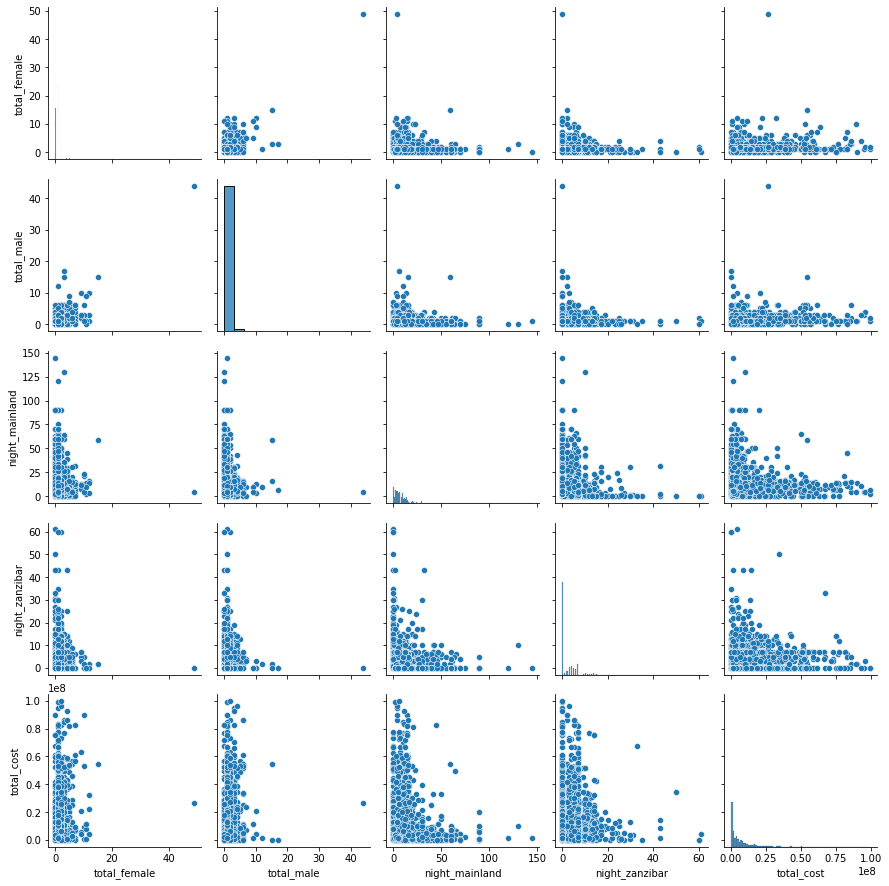

In [14]:
sns.pairplot(Tz)

Using the pairplotting above inorder to form some simple classification models by drawing some simple lines or make linear separation in our data-set to form a linear regression model.

<AxesSubplot:xlabel='total_cost', ylabel='night_mainland'>

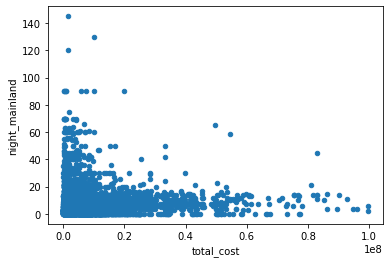

In [15]:
Tz.plot.scatter(x='total_cost',y='night_mainland')

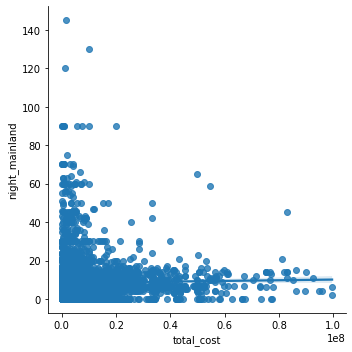

In [16]:
sns.lmplot(x='total_cost',y='night_mainland',data=Tz)

[Text(0.5, 1.0, 'SPENDING DISTIBUTION')]

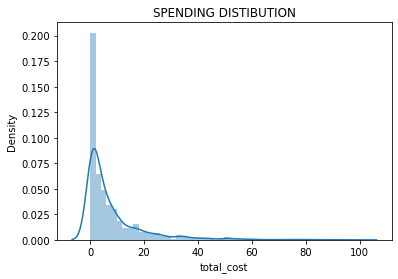

In [17]:
#Chart showing the linear distribution of tourist spending.

import warnings
warnings.filterwarnings('ignore')

sns.distplot(Tz['total_cost']/10**6).set(title='SPENDING DISTIBUTION')

In [18]:
#Data correlation of features.

Tz.corr()

total_female  total_male  night_mainland  night_zanzibar  \
total_female        1.000000    0.467000        0.031233        0.138523   
total_male          0.467000    1.000000       -0.041369        0.050172   
night_mainland      0.031233   -0.041369        1.000000       -0.118155   
night_zanzibar      0.138523    0.050172       -0.118155        1.000000   
total_cost          0.285862    0.183785        0.020473        0.145139   

                total_cost  
total_female      0.285862  
total_male        0.183785  
night_mainland    0.020473  
night_zanzibar    0.145139  
total_cost        1.000000

<AxesSubplot:>

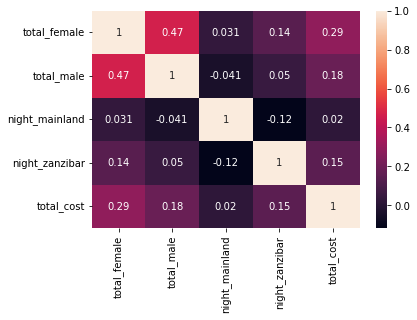

In [19]:
sns.heatmap(Tz.corr(), annot=True)

# Generating a summary EDA checks on the dataset

In [20]:
#import pandas profiling library 

from pandas_profiling import ProfileReport
profile = ProfileReport(Tz)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EXPLORATORY DATA ANALYSIS 

In [21]:
#top 5 countries with the highest spending statistics

countries = Tz[['country', 'total_cost']].head(8).groupby('country').sum()
countries

total_cost
country                             
CHINA                      1657500.0
SOUTH AFRICA                466140.0
SWIZERLAND                  674602.5
UNITED KINGDOM            14441106.5
UNITED STATES OF AMERICA   3480750.0

<AxesSubplot:title={'center':'TOP 5 COUNTRIES WITH HIGHEST SPENDING STATISTICS'}, xlabel='country'>

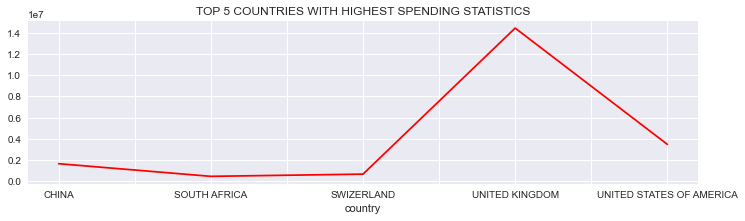

In [22]:
#CHAT SHOWING TOP 5 COUNTRIES WITH HIGHEST SPENDING STATISTICS

plt.style.use('seaborn')
countries.plot(figsize=(12,3), color='red', legend=False, title='TOP 5 COUNTRIES WITH HIGHEST SPENDING STATISTICS')

Of all the five countries shown above,
United Kingdom indicates the leading top most country in tourist spending. 

In [23]:
#COUNTRIES WITH HIGHEST TOURIST CITIZENS VISITING TANZANIA.

Tz[['country']].value_counts()

country                 
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
ANGOLA                        1
MONTENEGRO                    1
MORROCO                       1
MYANMAR                       1
MADAGASCAR                    1
Length: 105, dtype: int64

<AxesSubplot:title={'center':'COUNTRIES WITH HIGHEST TOURIST CITIZENS VISITING TANZANIA'}, ylabel='country'>

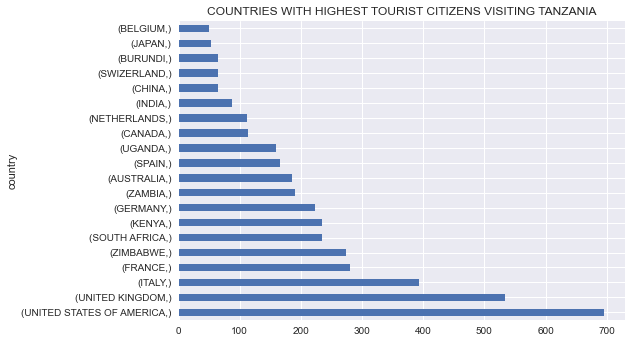

In [24]:
Tz[['country']].value_counts().head(20).plot(kind='barh', title='COUNTRIES WITH HIGHEST TOURIST CITIZENS VISITING TANZANIA')

In [25]:
#which age-group are the highest spenders and who are the over all highest spenders by travel with

In [26]:
Age = Tz[['age_group','total_cost','travel_with']]
Age

age_group  total_cost        travel_with
0        45-64    674602.5  Friends/Relatives
1        25-44   3214906.5              Alone
2        25-44   3315000.0              Alone
3        25-44   7790250.0             Spouse
4         1-24   1657500.0              Alone
...        ...         ...                ...
4804     45-64   3315000.0              Alone
4805     25-44  10690875.0             Spouse
4806      1-24   2246636.7              Alone
4807     25-44   1160250.0  Friends/Relatives
4808     25-44  13260000.0             Spouse

[4809 rows x 3 columns]

In [27]:
Age.describe(include = 'all')

age_group    total_cost travel_with
count       4809  4.809000e+03        4809
unique         4           NaN           5
top        25-44           NaN       Alone
freq        2487           NaN        2379
mean         NaN  8.114389e+06         NaN
std          NaN  1.222490e+07         NaN
min          NaN  4.900000e+04         NaN
25%          NaN  8.121750e+05         NaN
50%          NaN  3.397875e+06         NaN
75%          NaN  9.945000e+06         NaN
max          NaN  9.953288e+07         NaN

In [28]:
Age.groupby('age_group').sum()/10**6

total_cost
age_group              
1-24        3379.088150
25-44      14987.099938
45-64      15371.839260
65+         5284.068284

<AxesSubplot:title={'center':'HIGHEST SPENDING AGE GROUP'}, xlabel='age_group'>

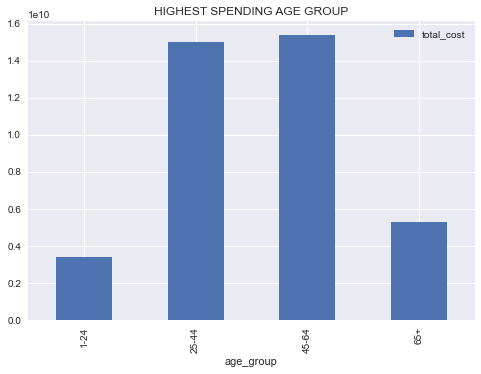

In [29]:
#HIGHEST SPENDING AGE GROUP
Age.groupby('age_group').sum().plot(kind='bar',title='HIGHEST SPENDING AGE GROUP')



Age group 45-64 has the highest spending statistics.

In [30]:
Age.groupby('travel_with').sum()

total_cost
travel_with                      
Alone                8.717835e+09
Children             1.653502e+09
Friends/Relatives    9.158700e+09
Spouse               1.274631e+10
Spouse and Children  6.745753e+09

In [31]:
#Highest age_group Tourist.

Age[['age_group']].value_counts()

age_group
25-44        2487
45-64        1391
1-24          624
65+           307
dtype: int64

<AxesSubplot:ylabel='None'>

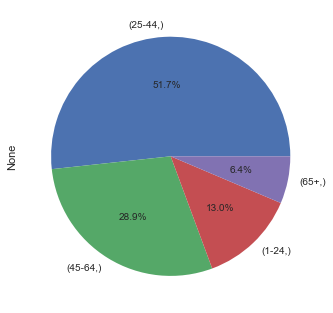

In [32]:
Age[['age_group']].value_counts().plot(kind='pie', autopct='%1.1f%%')

A pie chart show age_group representation in tourism activities in Tanzania

In [33]:
#COUNTRY WITH THE MOST SPENDING TOURIST

In [34]:
Tz[['country','total_cost']].head(10)

country  total_cost
0                SWIZERLAND    674602.5
1            UNITED KINGDOM   3214906.5
2            UNITED KINGDOM   3315000.0
3            UNITED KINGDOM   7790250.0
4                     CHINA   1657500.0
5            UNITED KINGDOM    120950.0
6              SOUTH AFRICA    466140.0
7  UNITED STATES OF AMERICA   3480750.0
8                   NIGERIA    994500.0
9                     INDIA   2486250.0

<AxesSubplot:title={'center':'COUNTRY WITH THE MOST SPENDING TOURIST'}>

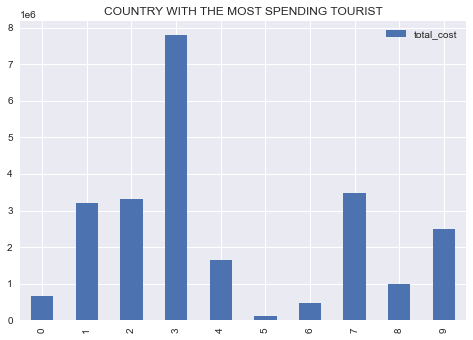

In [35]:
Tz[['country','total_cost']].head(10).plot(kind='bar',title='COUNTRY WITH THE MOST SPENDING TOURIST')



United Kindom (3) is the country with the most spending tourist
even though it falls second to USA with the highest number of tourist visiting Tanzania.

In [36]:
#AVERAGE NUMBER OF NIGHT TOURIST'S SPENDS ON TANZANIA MAINLAND

In [37]:
Tz[['night_mainland']].mean()

night_mainland    8.488043
dtype: float64

An average eight (8) number of nights is spend by a tourist on Tanzania mainland

In [38]:
#AVERAGE NUMBER OF NIGHT TOURIST'S SPENDS ON TANZANIA ZANZIBAR

In [39]:
Tz[['night_zanzibar']].mean()

night_zanzibar    2.304429
dtype: float64

Two(2) nights averagely is spent on Tanzania Zanzibar by tourist.

In [40]:
#MOST PREFERRED PAYMENT METHOD BY TOURIST

In [41]:
Tz[['payment_mode']].head(30)

payment_mode
0          Cash
1          Cash
2          Cash
3          Cash
4          Cash
5          Cash
6          Cash
7          Cash
8          Cash
9   Credit Card
10         Cash
11         Cash
12         Cash
13         Cash
14         Cash
15         Cash
16         Cash
17         Cash
18         Cash
19         Cash
20         Cash
21         Cash
22  Credit Card
23         Cash
24         Cash
25         Cash
26  Credit Card
27         Cash
28         Cash
29         Cash

In [42]:
type(Tz['payment_mode'].iloc[0])

str

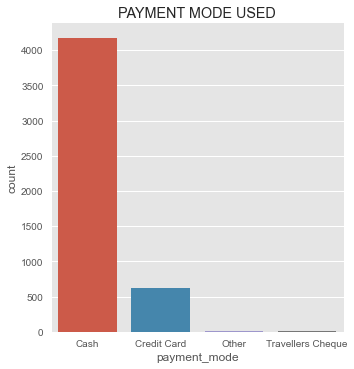

In [43]:
#CHART SHOWING MOST USED PAYMENT MODE BY TOURIST

plt.style.use('ggplot')
sns.catplot(data=Tz, x='payment_mode', kind='count').set(title='PAYMENT MODE USED')

The visualization above indicate most tourist prefered payment via cash.

In [44]:
#TOURISM MAIN ACTIVITIES IN TANZANIA

In [45]:
Tz[['main_activity']].head(10)

main_activity
0   Wildlife tourism
1   Cultural tourism
2   Cultural tourism
3   Wildlife tourism
4   Wildlife tourism
5   Wildlife tourism
6  Mountain climbing
7   Wildlife tourism
8   Cultural tourism
9   Wildlife tourism

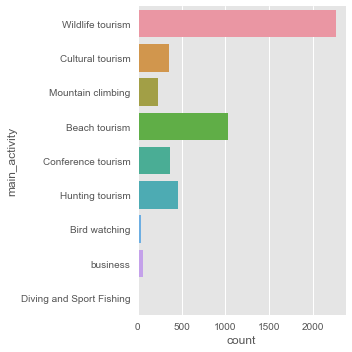

In [46]:
sns.catplot(data=Tz, y='main_activity', kind='count')

The tourist are more engaged in wildlife and beach tourism activities
every time they visit with Wildlife more participated.

In [47]:
Tz[['package_food']]

package_food
0              No
1              No
2              No
3             Yes
4              No
...           ...
4804           No
4805          Yes
4806           No
4807          Yes
4808          Yes

[4809 rows x 1 columns]

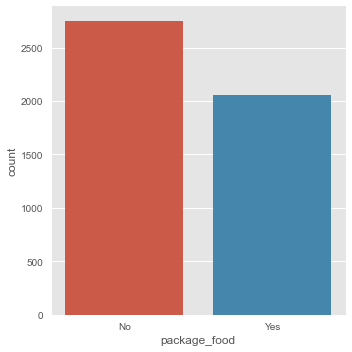

In [48]:
sns.catplot(data=Tz, x='package_food', kind='count')

Observation above, indicates most tourist prefer No package food during there tourist activities, 
this could be it's more delicious and safer or flexible in eating.


# DATA PROCESSING

In [49]:
#FEATURE ENGINEERING
#Getting arrays with features to train on

In [50]:
Tz.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [51]:
#PREPARING DATA FOR MODELLING

In [52]:
#features for modelling
X = Tz[['total_female',
       'total_male','night_mainland','night_zanzibar'
       ]]

In [53]:
#Target variable or Prediction variable.

Y = Tz[['total_cost']]

In [54]:
#Train test split

from sklearn.model_selection import train_test_split

In [55]:
X_test,X_train, Y_test,Y_train = train_test_split(X,Y, test_size=0.9, random_state=60)

# BUILDING A REGRESSION MODEL

In [56]:
#Creating and Training the model

from sklearn.linear_model import LinearRegression

In [57]:
#Instantiate model

lm = LinearRegression()

In [58]:
lm.fit(X_train,Y_train)

LinearRegression()

In [59]:
print(lm.intercept_)

[4462382.63431905]


In [60]:
lm.coef_

array([[2071453.64220804,  748866.97405083,   35552.52558308,
         293057.24098337]])

In [61]:
X_train.columns

Index(['total_female', 'total_male', 'night_mainland', 'night_zanzibar'], dtype='object')

# EVALUATING OUR MODEL PERFORMANCE IN PREDICTING SPENDING BEHAVIOUR

#PREDICTIONS

In [62]:
prediction = lm.predict(X_test)

In [63]:
#Predicted spending cost of tourist/ indicating their spending behaviours
prediction

array([[ 5317907.18511913],
       [ 5602327.3897838 ],
       [ 9334103.93746147],
       [ 5708984.96653305],
       [ 5389012.2362853 ],
       [ 5957852.64561464],
       [ 5246802.13395296],
       [ 6676046.37885942],
       [ 5424564.76186838],
       [ 5246802.13395296],
       [ 6102326.68475304],
       [ 9582971.61654306],
       [12636660.34162491],
       [ 5282354.65953605],
       [ 7389360.82732717],
       [10458549.12266762],
       [ 5460117.28745147],
       [ 6410394.06156773],
       [ 8778173.26187351],
       [ 5353459.71070221],
       [ 8458200.53162575],
       [ 5424564.76186838],
       [ 9582482.18211578],
       [ 5246802.13395296],
       [ 5531222.33861763],
       [10799390.1423783 ],
       [ 7496018.40407642],
       [ 9334103.93746147],
       [ 5682069.47726866],
       [ 5744537.49211614],
       [ 8988220.09825764],
       [ 6137879.21033613],
       [ 7780438.60874109],
       [ 6960466.58352409],
       [ 9103514.71132558],
       [10600759.224

In [64]:
#Y_test containing the correct spending cost/habit of tourist
Y_test

total_cost
4284    130000.0
3401   8453250.0
3204   7293000.0
3362    497250.0
3822   6132750.0
...          ...
2147   6298500.0
1418   3480750.0
3654   8619000.0
3137    600000.0
2253    497250.0

[480 rows x 1 columns]

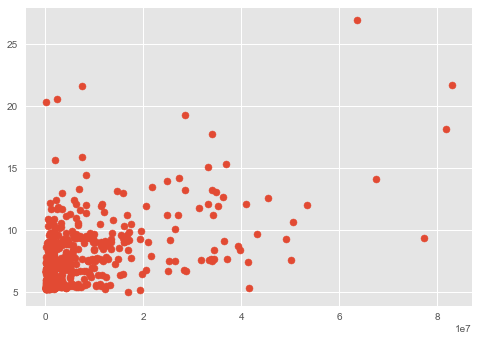

In [65]:
#Comparing Y_test to the prediction to find the residuals
plt.scatter(Y_test, prediction/10**6)

<AxesSubplot:ylabel='Density'>

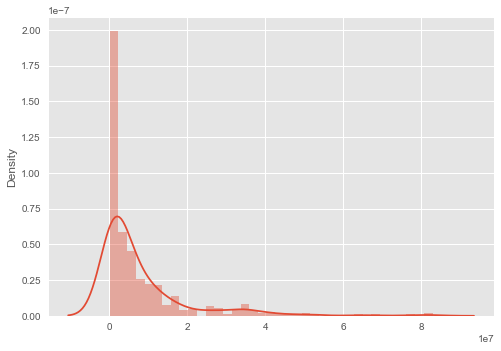

In [66]:
#Plotting histogram distribution of the residuals
sns.distplot(Y_test- prediction/10**6)

 EVALUATING THE MODEL With Loss functions
 so ass to minimise the errors.

REGRESSION EVALUATION METRICS:

In [67]:
#Looking at the Linear evaluation metrics we get:

from sklearn import metrics

In [68]:
#Average error of the model
metrics.mean_absolute_error(Y_test,prediction)

7232385.834148328

In [69]:
#Check-mating larger errors by squaring.

metrics.mean_squared_error(Y_test,prediction)

121440898468113.73

In [70]:
#RMSE Interpreting the Y units prediction.

np.sqrt(metrics.mean_squared_error(Y_test,prediction))

11020022.616497379

In [71]:
r_squared = lm.score(X, Y)

In [72]:
print(r_squared)

0.09682259179087571


In [73]:
r_squared = lm.score(X_test,prediction)

In [74]:
print(r_squared)

1.0


In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(Y_test,prediction)

0.1787447445823661

In [77]:
r2_score(Y_test,prediction).dtype

dtype('float64')

Our model reads r2_score of 18% approx performance in prediction.

# TESTING LINEAR MODEL ASSUMPTION

Using/importing another dataset to test our model performance,

In [78]:
from sklearn.svm import SVC

In [79]:
tz = pd.read_csv('Test .csv')
tz

ID                   country age_group          travel_with  \
0        tour_1                 AUSTRALIA     45-64               Spouse   
1      tour_100              SOUTH AFRICA     25-44    Friends/Relatives   
2     tour_1001                   GERMANY     25-44    Friends/Relatives   
3     tour_1006                    CANADA    24-Jan    Friends/Relatives   
4     tour_1009            UNITED KINGDOM     45-64    Friends/Relatives   
...         ...                       ...       ...                  ...   
1596   tour_988  UNITED STATES OF AMERICA     25-44                  NaN   
1597   tour_990                     ITALY     45-64  Spouse and Children   
1598   tour_992                   FINLAND     25-44                Alone   
1599   tour_996              SOUTH AFRICA    24-Jan                Alone   
1600   tour_998              SOUTH AFRICA     25-44               Spouse   

      total_female  total_male                  purpose      main_activity  \
0              1.0         1.0     Leisure and Holidays   Wildlife tourism   
1              0.0         4.0                 Business   Wildlife tourism   
2              3.0         0.0     Leisure and Holidays      Beach tourism   
3              2.0         0.0     Leisure and Holidays   Cultural tourism   
4              2.0         2.0     Leisure and Holidays   Wildlife tourism   
...            ...         ...                      ...                ...   
1596           0.0         1.0  Meetings and Conference  Mountain climbing   
1597           3.0         1.0     Leisure and Holidays   Wildlife tourism   
1598           0.0         1.0  Meetings and Conference  Mountain climbing   
1599           0.0         1.0                 Business      Beach tourism   
1600           1.0         1.0     Leisure and Holidays   Cultural tourism   

                         info_source tour_arrangement  ... package_food  \
0       Travel, agent, tour operator     Package Tour  ...          Yes   
1            Tanzania Mission Abroad     Package Tour  ...           No   
2                 Friends, relatives      Independent  ...           No   
3                             others      Independent  ...           No   
4                 Friends, relatives     Package Tour  ...          Yes   
...                              ...              ...  ...          ...   
1596  Newspaper, magazines,brochures      Independent  ...           No   
1597              Friends, relatives     Package Tour  ...          Yes   
1598              Friends, relatives      Independent  ...           No   
1599              Friends, relatives      Independent  ...           No   
1600                  Radio, TV, Web      Independent  ...           No   

     package_transport_tz package_sightseeing package_guided_tour  \
0                     Yes                 Yes                 Yes   
1                      No                  No                  No   
2                      No                  No                  No   
3                      No                  No                  No   
4                     Yes                  No                  No   
...                   ...                 ...                 ...   
1596                   No                  No                  No   
1597                  Yes                 Yes                  No   
1598                   No                  No                  No   
1599                   No                  No                  No   
1600                   No                  No                  No   

     package_insurance night_mainland night_zanzibar  payment_mode  \
0                  Yes             10              3          Cash   
1                   No             13              0          Cash   
2                   No              7             14          Cash   
3                   No              0              4          Cash   
4                   No             10              0          Cash   
...          

In [80]:
tz.corr()

total_female  total_male  night_mainland  night_zanzibar
total_female        1.000000    0.288933        0.015265        0.078020
total_male          0.288933    1.000000       -0.035880        0.020622
night_mainland      0.015265   -0.035880        1.000000        0.516262
night_zanzibar      0.078020    0.020622        0.516262        1.000000

<AxesSubplot:>

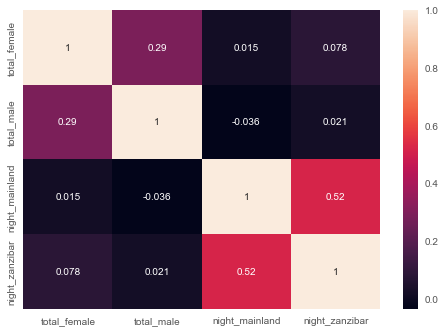

In [81]:
sns.heatmap(tz.corr(), annot=True)

In [82]:
lm.fit(X,Y)

LinearRegression()

In [83]:
Y_pred = lm.predict(X_test)

In [84]:
Y_pred

array([[ 5082921.44689458],
       [ 5356361.05250342],
       [ 9505993.91042197],
       [ 5458900.90460673],
       [ 5151281.34829679],
       [ 5698160.55951447],
       [ 5014561.54549237],
       [ 6635229.06918205],
       [ 5185461.29899789],
       [ 5014561.54549237],
       [ 5851962.15137201],
       [ 9745253.56532971],
       [12918546.98377004],
       [ 5048741.49619347],
       [ 7335909.87225727],
       [10563018.70630403],
       [ 5219641.249699  ],
       [ 6261982.81835893],
       [ 8686009.73865349],
       [ 5117101.39759568],
       [ 8378390.18234354],
       [ 5185461.29899789],
       [ 9776798.26095763],
       [ 5014561.54549237],
       [ 5288001.15110121],
       [11129296.68918484],
       [ 7438449.72436059],
       [ 9505993.91042197],
       [ 5475941.90404936],
       [ 5493080.85530784],
       [ 9044711.50368083],
       [ 5886142.10207311],
       [ 7711889.32996943],
       [ 6908668.67479089],
       [ 9198472.30592788],
       [10699738.509

In [85]:
#Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = lm.score(X_test,Y_pred)

In [86]:
accuracy

1.0

Interestingly, after testing our model with another datset(Test .csv) looking at the data correlations, 
our model was able to predict(Y_pred) the spending rate of the tourist considering the data is missing the total_cost column or feature. Our model achieve accuracy of 1.0(100%) prediction of spending habit
of tourist in the tz data i.e Test .csv file.

In [87]:
X_test

total_female  total_male  night_mainland  night_zanzibar
4284           0.0         1.0             3.0             0.0
3401           0.0         1.0            11.0             0.0
3204           1.0         1.0             0.0             7.0
3362           0.0         1.0            14.0             0.0
3822           0.0         1.0             5.0             0.0
...            ...         ...             ...             ...
2147           1.0         1.0             0.0             7.0
1418           1.0         1.0             2.0             0.0
3654           1.0         1.0             7.0             0.0
3137           0.0         1.0             2.0             0.0
2253           1.0         0.0             3.0             0.0

[480 rows x 4 columns]

In [88]:
Y_pred.sum()

3773139286.330149

# Actionable Insights and Recommendations

Besides observation listed in the markdown text, The need for the tourism sector 
to pay more attention to tourism activities not attracting tourist attention such as 
1. Business tourism which can boost the industry spread.
2. The Conference tourism, a major publicity strategy. As its upgrade and optimization will further 
   attract interesting and engaging event to the venue.
3. The wildlife have seen monumental activities in the area with aid of experienced and skillful
management. It will be interesting to tap into their potential to encourage their colleagues in other
tourism sector.

Secondly, its been observed that most tourist prefer payment via direct cash. This is risky considering the 
currency exchange rate of Tanzanian shillings to Europe, USA, etc. making tourist to move about with
large sum of money. It will be preferable to encourage an electronic payment system which has more
value return on investment.
Lastly, non packaged food is mostly preferred by tourist due to its flexibility, sweetness and
freshness. So a more priority to be channel towards its expansion.

NOTE: The model chosen for this project didn't really fit into the dataset given, producing a not too regular regression pattern which may affect the model durability & performance in future. Using other regression model such as Three distribution, etc will be really helpful in future development.

